In [1]:
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

import numpy as np
from typing import Union
import math

sys.path.append('..')
from lib.model_utils import ModelUtil, export_rules_to_csv
utils = ModelUtil(data_name = 'german', model_name = 'random forest')

Test
Accuracy Score is 0.828
Precision Score is 0.8663101604278075
F1 Score is 0.88283378746594
Train
Accuracy Score is 0.8932692307692308


In [3]:
mat = utils.get_cover_matrix(utils.X, fuzzy = True)

In [14]:
mat0 = utils.get_cover_matrix(utils.X, fuzzy = False)

In [6]:

from sklearn.neighbors import LocalOutlierFactor

class LOFMatrix():
    def __init__(self, data: np.ndarray, metric = 'euclidean'):
        self.data = data

        self.max_dist = None
        self.n_points = self.data.shape[0]
        self.indice = None
        self.dist_matrix = pairwise_distances(X = self.data, metric=metric)
        self.sorted_neighbors = np.argsort(self.dist_matrix, axis=1)

    def run(self):
        self.rs = []
        self.scores = []

        n_steps = 40
        for i in range(n_steps):
            r = (i + 1) * 5
            print(r)
            self.rs.append(r)
            detector = LocalOutlierFactor(metric="precomputed", n_neighbors=r)
            detector.fit_predict(self.dist_matrix)
            self.scores.append(-detector.negative_outlier_factor_)

        self.scores = np.array(self.scores).transpose()
        self.outlier_score = self.scores[:, 4]
        return True


In [7]:
res = LOFMatrix(mat, metric = 'cosine')
res.run()

KeyboardInterrupt: 

In [10]:
res0 = LOFMatrix(mat0, alpha = 0.8, metric = 'cosine')
res0.run()

r range: 0.250 - 1.080, alpha: 0.800


True

In [8]:
rese = LOFMatrix(mat, metric = 'euclidean')
rese.run()

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200


True

In [27]:
from sklearn.manifold import TSNE
x_tsne = TSNE(n_components=2, metric='precomputed').fit_transform(res.dist_matrix)

/home/lizhen/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lizhen/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/lizhen/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


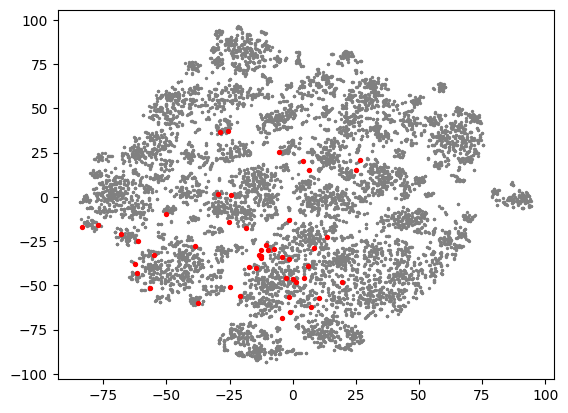

In [136]:
anomaly = res_e.outlier_score.argsort()[-50:][::-1]
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], s = 2, color='gray')
plt.scatter(x_tsne[anomaly, 0], x_tsne[anomaly, 1], s = 8, color='red')
plt.show()

In [9]:
all_labels = {7305: 1, 8624: 0, 1884: 1, 468: 1, 6290: 0, 8055: 0, 2280: 1, 3400: 1, 4466: 0, 4650: 0, 6028: 1, 4459: 1, 1411: 1, 665: 0, 868: 1, 8911: 1, 3848: 0, 9283: 0, 5218: 0, 3035: 0, 1010: 1, 8934: 1, 6483: 1, 2807: 1, 5767: 1, 1763: 1, 4479: 1, 679: 1, 873: 1, 6641: 1, 178: 0, 2278: 1, 7567: 0, 287: 1, 7527: 1, 6569: 1, 3487: 1, 2363: 1, 1750: 0, 2300: 1, 6277: 0, 8240: 1, 7499: 1, 525: 0, 4785: 0, 9324: 0, 3337: 1, 3617: 1, 5003: 1, 2089: 1, 3204: 1, 991: 1, 2167: 1, 3488: 1, 1507: 1, 1840: 1, 4932: 1, 254: 1, 9096: 1, 5974: 0, 7529: 1, 2764: 1, 9134: 1, 2112: 0, 7845: 0, 8073: 1, 4657: 0, 3270: 1, 5502: 1, 616: 1, 6787: 0, 6801: 1, 3486: 1, 405: 1, 3485: 1, 8092: 1, 1393: 0, 668: 1, 8389: 0, 2277: 1, 8629: 0, 1520: 1, 4104: 1, 712: 0, 6952: 1, 1330: 1, 8415: 1, 6471: 1, 690: 1, 5575: 1, 5590: 0, 5252: 0, 2079: 1, 1940: 0, 3891: 1, 2916: 0, 1939: 1, 6839: 0, 4384: 1, 3628: 1, 2664: 1, 8645: 1, 7572: 1, 736: 0, 2228: 1, 4759: 1, 729: 0, 4980: 1, 2009: 1, 2099: 0, 4995: 0, 7810: 1, 7571: 1, 5459: 1, 2817: 1, 4812: 1, 4983: 0, 6289: 0, 8022: 0, 4647: 1, 3618: 1, 9452: 1, 4978: 1, 4350: 1, 2706: 1, 758: 1, 2500: 0, 1017: 0, 7915: 0, 5237: 1, 1963: 1, 7556: 0, 3451: 1, 4977: 1, 7456: 1, 424: 1, 4867: 1, 2279: 1, 4234: 0, 3313: 1, 1703: 1, 9289: 0, 827: 0, 8258: 1}


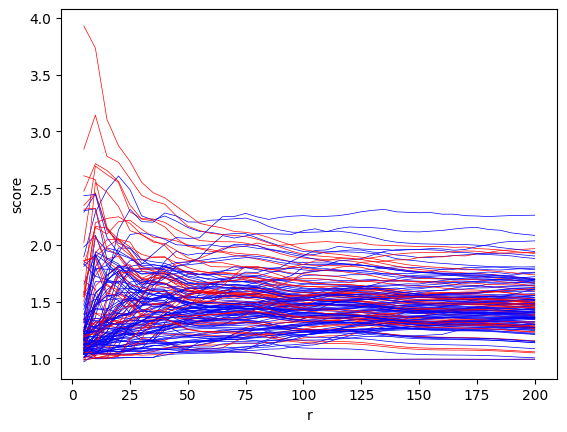

In [10]:
fig, ax = plt.subplots()
fp = [i for i in all_labels if all_labels[i] == 0]
tp = [i for i in all_labels if all_labels[i] == 1]
lines = []

xs = rese.rs[:]
for x in fp:
    lines.append((rese.scores[x, :], 'r', x))
for x in tp:
    lines.append((rese.scores[x, :], 'b', x))

import random
random.shuffle(lines)
for (ys, color, index) in lines:
    ax.plot(xs, ys, color=color, linewidth=0.5)
ax.set_xlabel('r')
ax.set_ylabel('score')
plt.show()

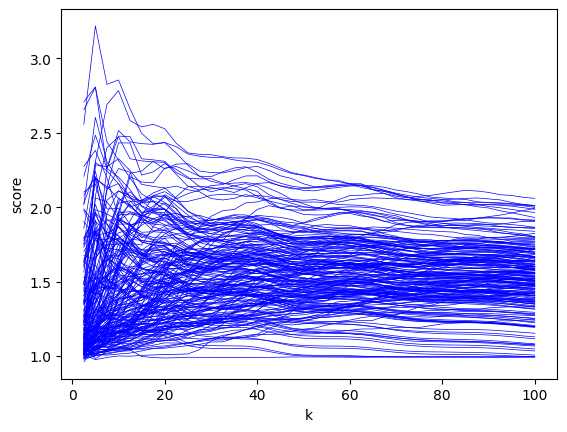

In [16]:
fig, ax = plt.subplots()
lines = []

xs = np.array(rese.rs[:]) * 0.5
idxes =  range(2, 9000, 45)
for x in idxes:
    lines.append((rese.scores[x, :], 'b', x))

import random
random.shuffle(lines)
for (ys, color, index) in lines:
    ax.plot(xs, ys, color=color, linewidth=0.5)
ax.set_xlabel('k')
ax.set_ylabel('score')
plt.show()

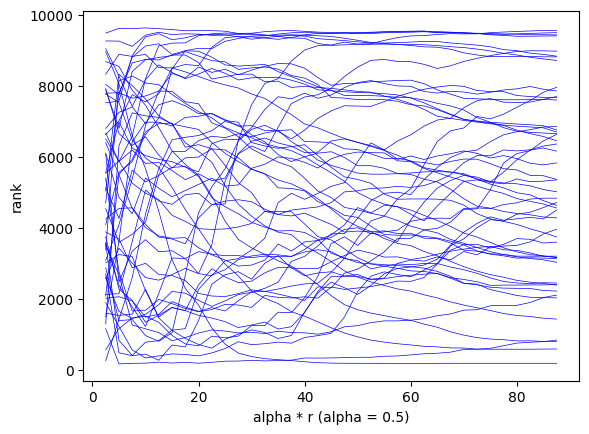

In [18]:
fig, ax = plt.subplots()
lines = []

ranks = np.zeros(rese.scores.shape)
for i in range(ranks.shape[1]):
    ranks[rese.scores[:, i].argsort(), i] = range(ranks.shape[0])

xs = np.array(rese.rs[:-5]) * 0.5
idxes =  range(2, 9000, 180)
for x in idxes:
    lines.append((ranks[x, :-5], 'b', x))

import random
random.shuffle(lines)
for (ys, color, index) in lines:
    ax.plot(xs, ys, color=color, linewidth=0.5)
ax.set_xlabel('alpha * r (alpha = 0.5)')
ax.set_ylabel('rank')
plt.show()

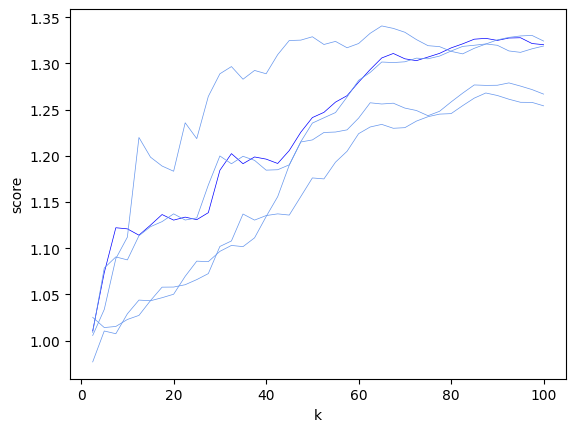

In [23]:
fig, ax = plt.subplots()
lines = []

xs = np.array(rese.rs[:]) * 0.5
idx = 8028
idxes = rese.sorted_neighbors[idx, :5]
for x in idxes:
    lines.append((rese.scores[x, :], 'b' if x == idx else 'cornflowerblue', x))

import random
random.shuffle(lines)
for (ys, color, index) in lines:
    ax.plot(xs, ys, color=color, linewidth=0.5)
ax.set_xlabel('k')
ax.set_ylabel('score')
plt.show()

In [14]:
vec

array([4., 2., 1., 0., 3.])